In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,TargetEncoder
from ucimlrepo import fetch_ucirepo, list_available_datasets

%matplotlib inline 

In [2]:
# fetch dataset 
# mushroom = fetch_ucirepo(id=73) # I got some error accessing the data using fetch_ucirepo when I try to rerun the code, luckily, I got a downloaded version 

In [3]:
mushroom = pd.read_csv('agaricus-lepiota.data')

In [4]:
mushroom

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [11]:
# it does not have the column names, I have to add manually
attributes = [
    'poisonous',
    'cap-shape',
    'cap-surface',
    'cap-color',
    'bruises?',
    'odor',
    'gill-attachment',
    'gill-spacing',
    'gill-size',
    'gill-color',
    'stalk-shape',
    'stalk-root',
    'stalk-surface-above-ring',
    'stalk-surface-below-ring',
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-type',
    'veil-color',
    'ring-number',
    'ring-type',
    'spore-print-color',
    'population',
    'habitat'
]

mushroom.columns =attributes
mushroom


,poisonous,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


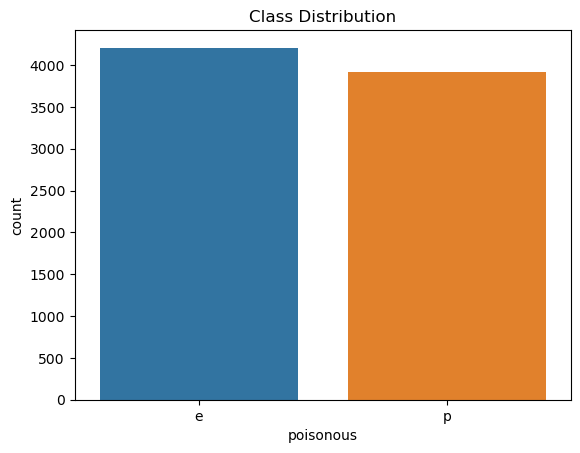

In [12]:
# get the data frame and the target, exam class balance
# df = mushroom['data']['features'].copy() # the way to use the data with api call 
# target = mushroom['data']['targets'].copy() # the way to use the data with api call 
df = mushroom.iloc[:,1:].copy()
target = mushroom.iloc[:,0:1].copy()
sns.countplot(x='poisonous', data=target)
plt.title('Class Distribution')
plt.show()

* The dataset is quite balanced between the class

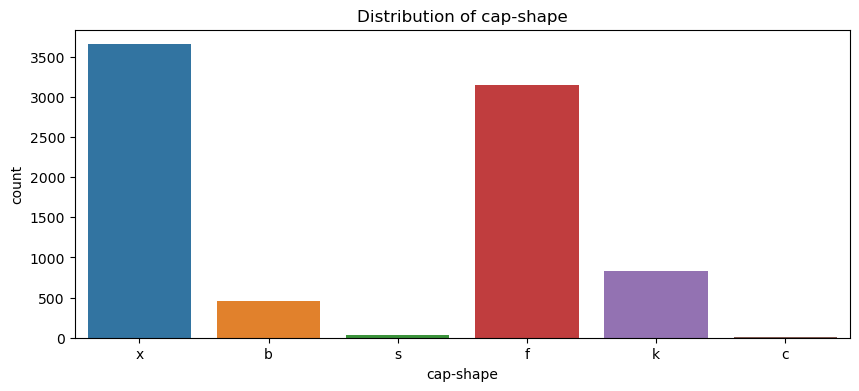

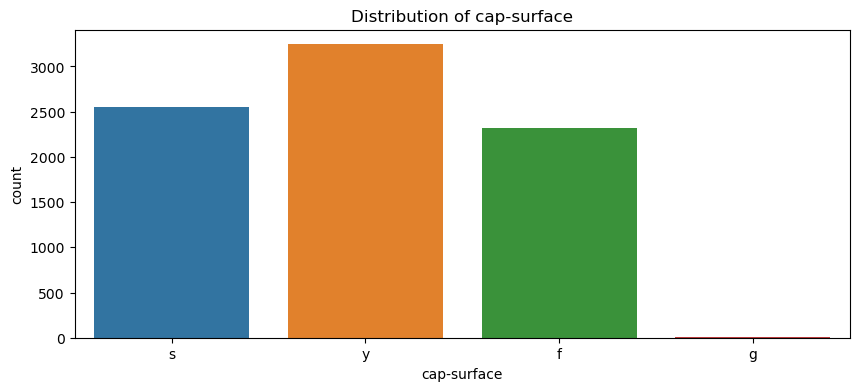

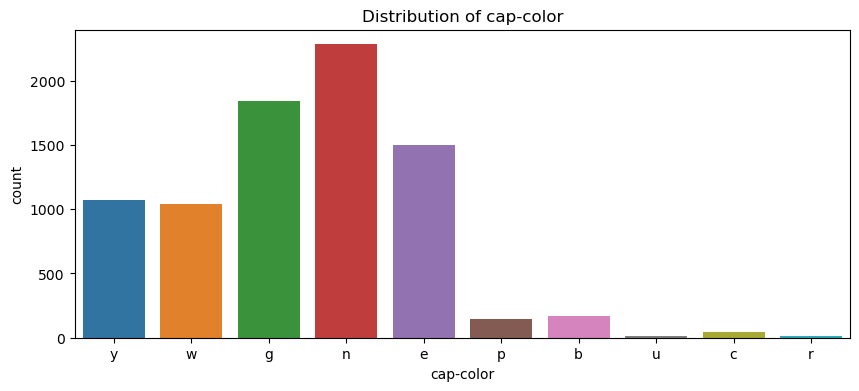

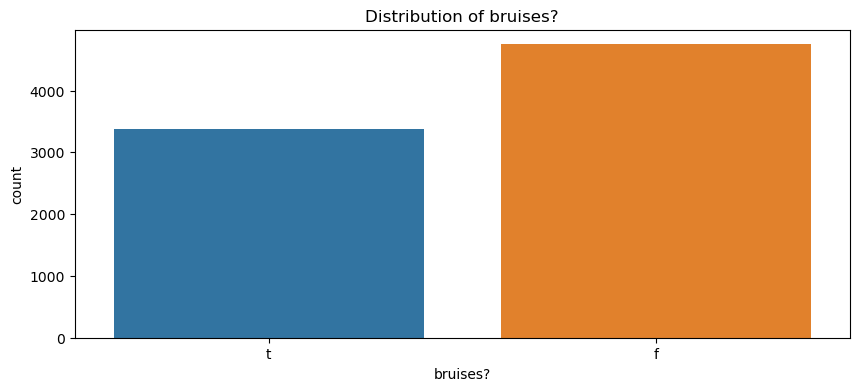

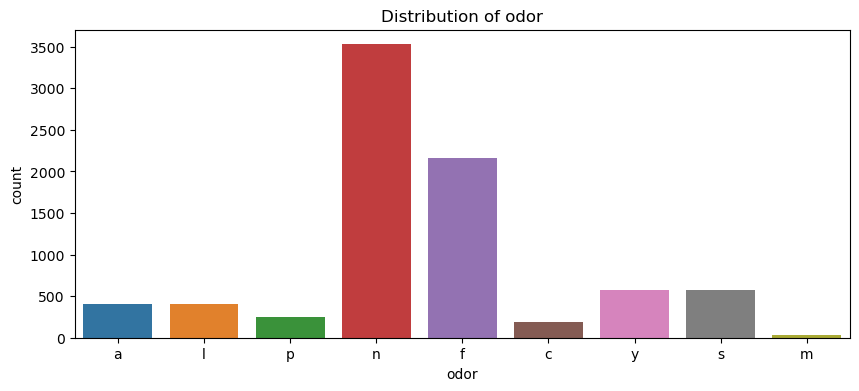

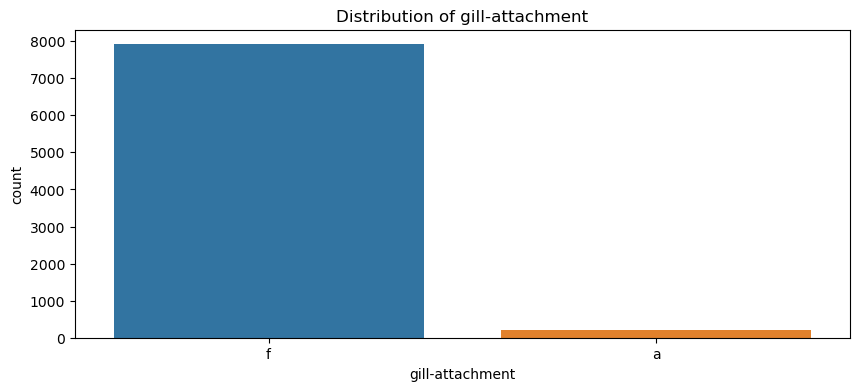

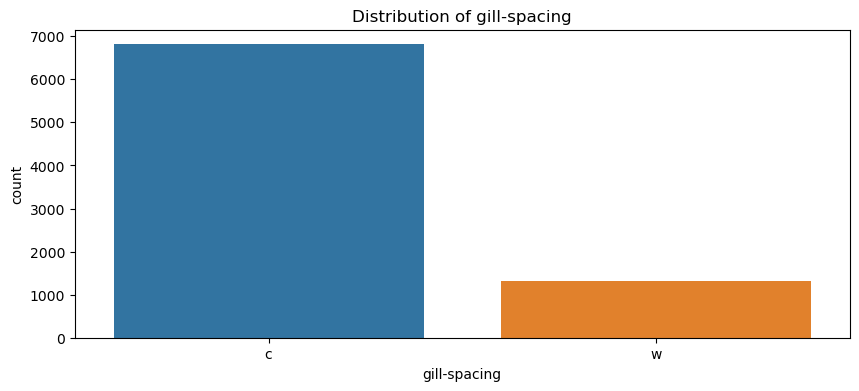

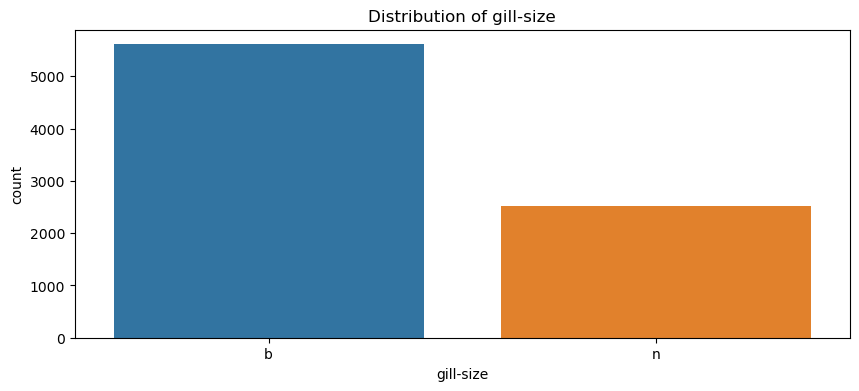

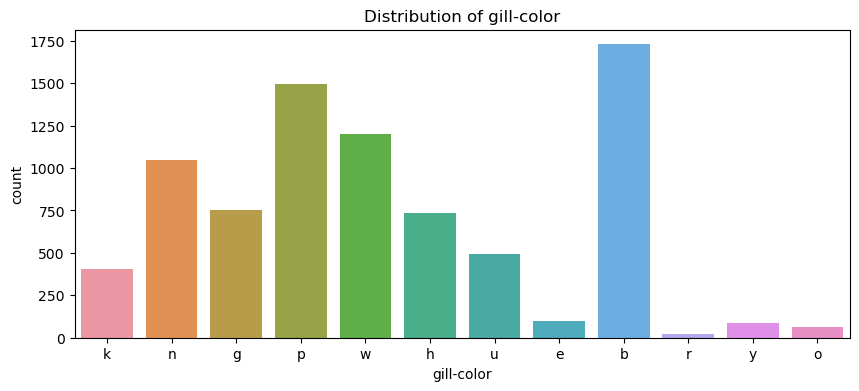

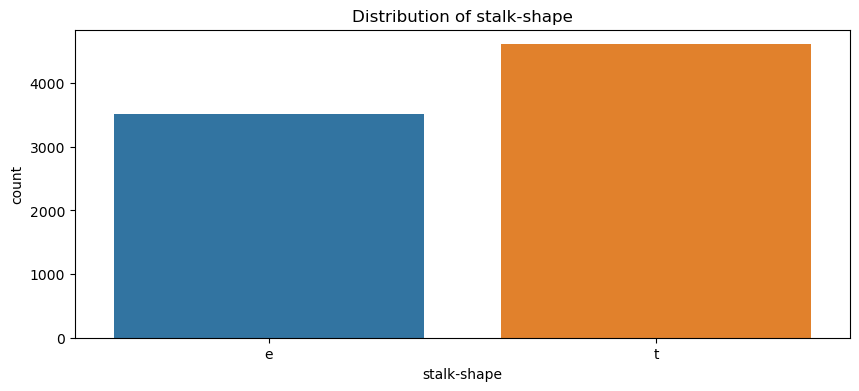

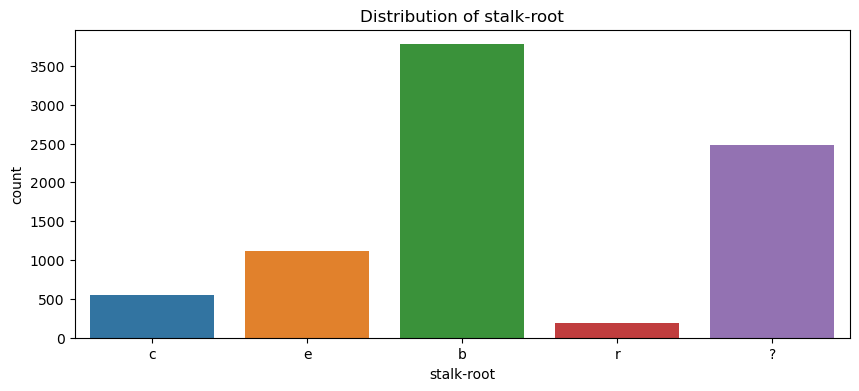

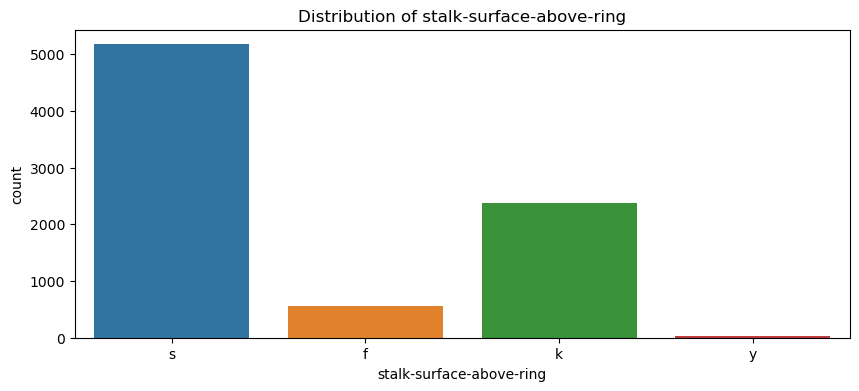

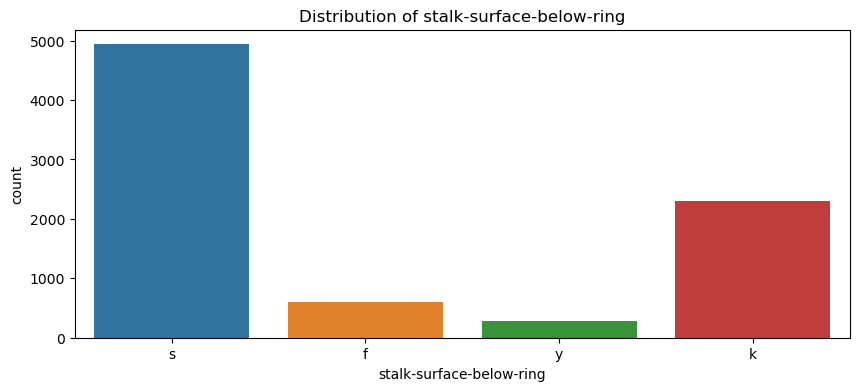

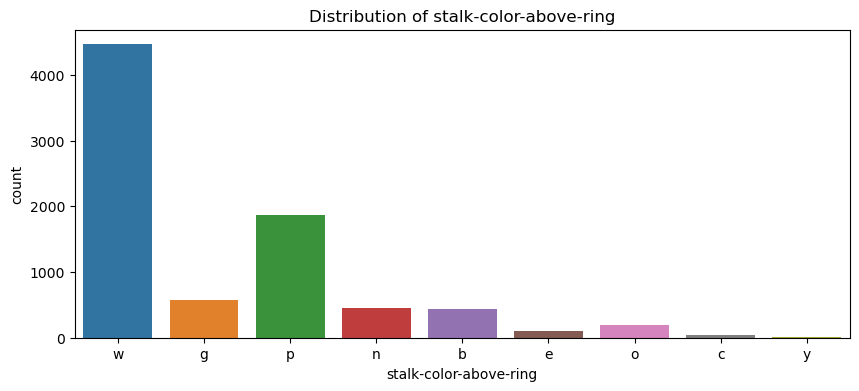

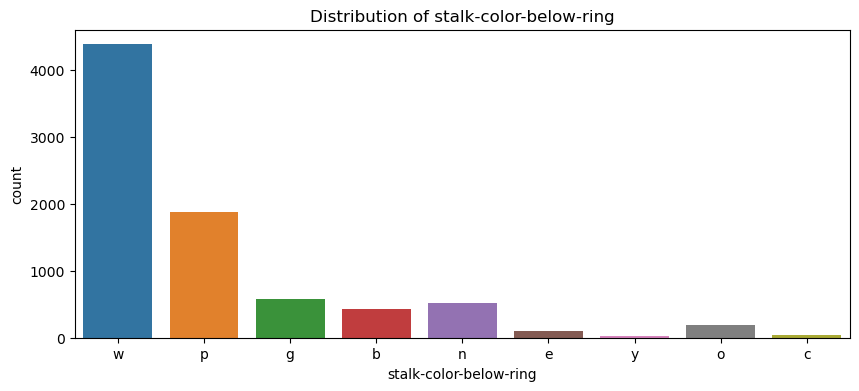

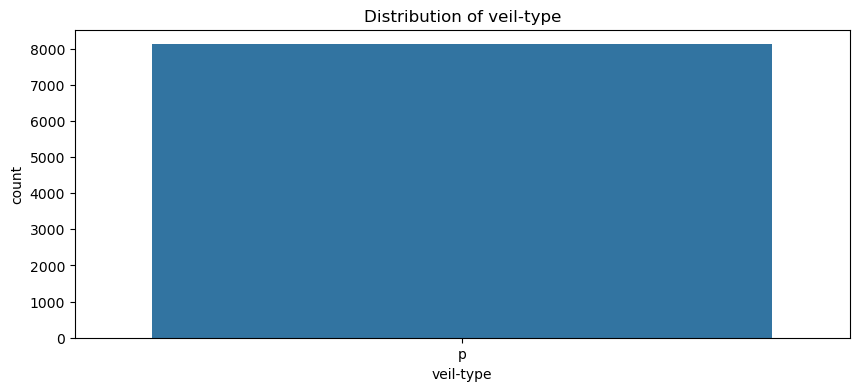

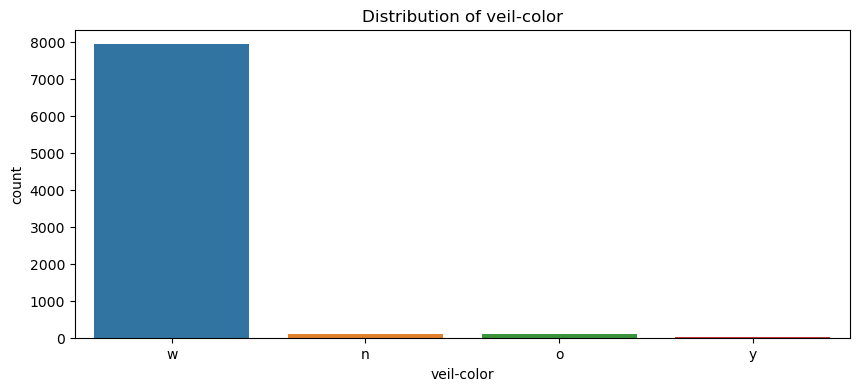

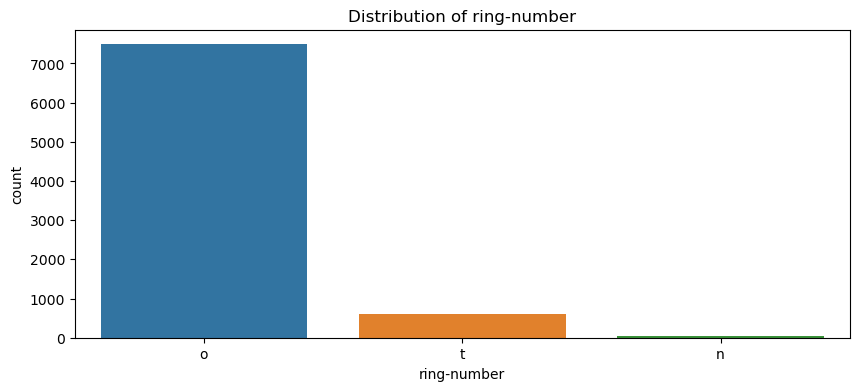

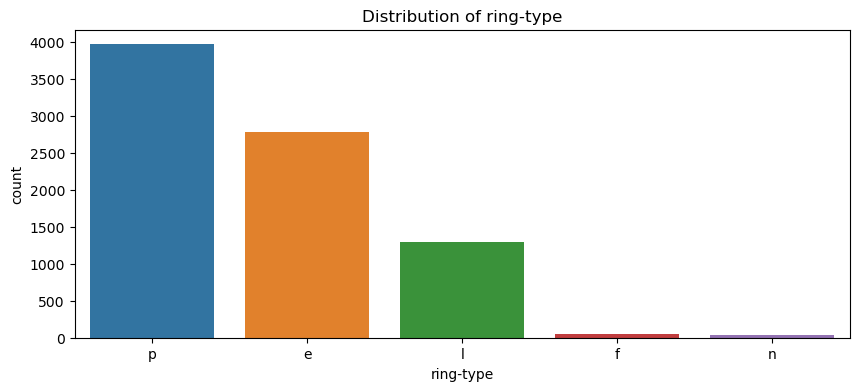

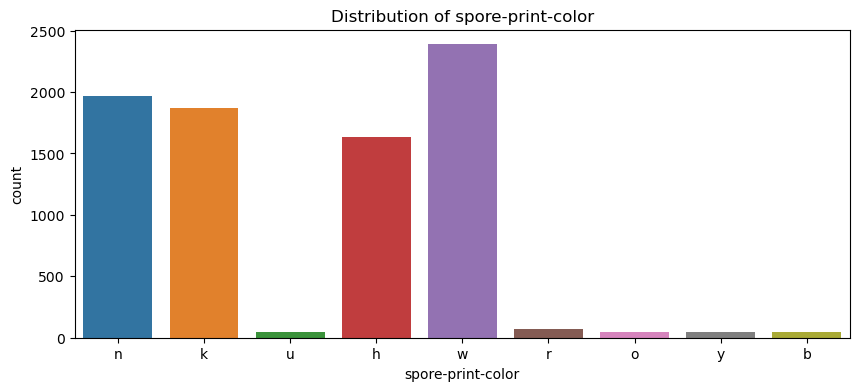

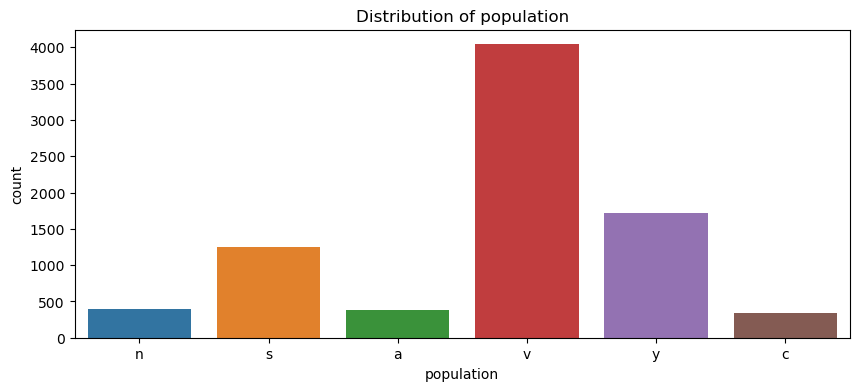

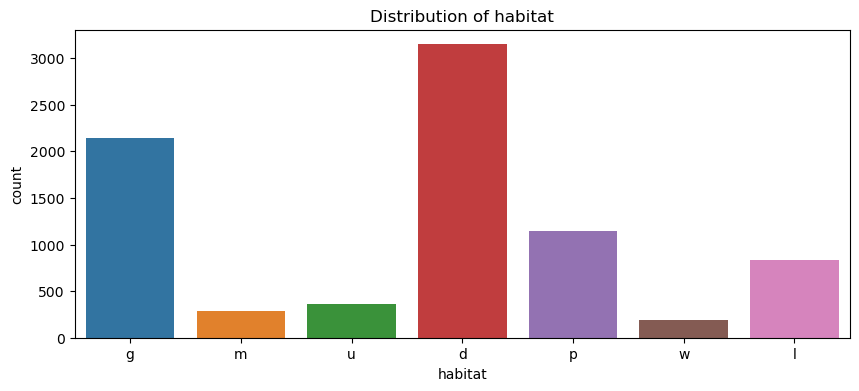

In [13]:
for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()


* In the current data, veil-type only have 1 value

In [15]:
# check for NaN values

df.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [16]:
# fillna using UnKnown as a value, we don't have any missing values now, but we can have some with new data
df = df.fillna('UnKnown')

In [17]:
def cramers_v(series1, series2):

    # Create a contingency table
    data = pd.crosstab(series1, series2)
    
    # Perform Chi-squared test
    chi2, p, dof, expected = chi2_contingency(data)
    
    # Total number of observations
    n = np.sum(np.sum(data))
    
    # Minimum dimension (the lesser of number of rows or columns, minus one)
    min_dimension = min(data.shape) - 1
    
    # Calculate Cramer's V
    return np.sqrt(chi2 / (n * min_dimension))

In [18]:
encoder = OrdinalEncoder(dtype='int')
encoded_df = encoder.fit_transform(df)
df = pd.DataFrame(encoded_df, columns=df.columns)

In [19]:
target['y']= target.poisonous.apply(lambda x: 1 if x =='p' else 0)

In [20]:
corr ={}
for col in df.columns:
    corr[col] = cramers_v(df[col],target['y'])

C:\Users\Taiyu\AppData\Local\Temp\ipykernel_6008\2362212205.py:16: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dimension))


In [21]:
corr

{'cap-shape': 0.24560325321349627,
 'cap-surface': 0.1968525168109299,
 'cap-color': 0.21848409259405063,
 'bruises?': 0.5015083708658599,
 'odor': 0.9710015865556211,
 'gill-attachment': 0.128411576970035,
 'gill-spacing': 0.3480232096902254,
 'gill-size': 0.5396770165082024,
 'gill-color': 0.6810359393475196,
 'stalk-shape': 0.10163924591741487,
 'stalk-root': 0.40702979180409177,
 'stalk-surface-above-ring': 0.5880774677130961,
 'stalk-surface-below-ring': 0.5749633783764926,
 'stalk-color-above-ring': 0.524937275084916,
 'stalk-color-below-ring': 0.5148131948014218,
 'veil-type': nan,
 'veil-color': 0.1534131621070821,
 'ring-number': 0.2147557613531519,
 'ring-type': 0.6034595656160414,
 'spore-print-color': 0.752860398515318,
 'population': 0.48752464872935375,
 'habitat': 0.4400528118194743}

* odor have a very strong correlation to the target variable

In [23]:
# build baselien model using light-gbm as tree models handles catgorical features well

df =df.astype('category') # change the variable type to category in order to let lightgbm know

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8123 non-null   category
 1   cap-surface               8123 non-null   category
 2   cap-color                 8123 non-null   category
 3   bruises?                  8123 non-null   category
 4   odor                      8123 non-null   category
 5   gill-attachment           8123 non-null   category
 6   gill-spacing              8123 non-null   category
 7   gill-size                 8123 non-null   category
 8   gill-color                8123 non-null   category
 9   stalk-shape               8123 non-null   category
 10  stalk-root                8123 non-null   category
 11  stalk-surface-above-ring  8123 non-null   category
 12  stalk-surface-below-ring  8123 non-null   category
 13  stalk-color-above-ring    8123 non-null   catego

In [24]:

import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def train_and_evaluate_lightgbm(X, y, params, n_splits=5):
    # Set up Stratified K-Fold cross-validation
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1009)

    # List to store the accuracy of each fold
    metrics = []
    iteratiions = []
    # Cross-validation
    for train_index, val_index in kf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Create LightGBM classifier
        model = lgb.LGBMClassifier(**params)

        # Train the model
        model.fit(X_train, y_train, 
                  eval_set=[(X_train, y_train), (X_val, y_val)], 
                  eval_metric='logloss', 
                  callbacks=[lgb.callback.early_stopping(stopping_rounds=20)],
                  categorical_feature='auto')
        iteratiions.append(model.best_iteration_ )
        # Predict on validation set
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        auc = roc_auc_score(y_val, y_pred_proba)
        
        metrics.append({
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'AUC': auc
        })
        print(f'Fold Metrics: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1 Score={f1:.4f}, AUC={auc:.4f}')

    # Create DataFrame for metrics
    metrics_df = pd.DataFrame(metrics)
    average_metrics = metrics_df.mean()
    print(f'Average Metrics: {average_metrics}')    
    print(f'Average best iteration: {np.mean(iteratiions)}')   
    return model, average_metrics


In [25]:
params = {
    'objective': 'binary',
    'n_estimators': 200,
    'learning_rate': 0.1,
    'num_leaves': 128,
    # 'max_depth': 11,
    'verbosity': -1,
    # 'reg_alpha': 0.5,
    # 'reg_lambda': 0.5,
    "importance_type": "gain",
    "random_state": 1009
}
baseline, baseline_stats = train_and_evaluate_lightgbm(df,target['y'],params)

Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 4.22921e-06	valid_1's binary_logloss: 4.29445e-06
Fold Metrics: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1 Score=1.0000, AUC=1.0000
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 4.57083e-06	valid_1's binary_logloss: 5.02866e-06
Fold Metrics: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1 Score=1.0000, AUC=1.0000
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 4.38699e-06	valid_1's binary_logloss: 4.70117e-06
Fold Metrics: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1 Score=1.0000, AUC=1.0000
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 4.1325

* looks like the baseline model is performing really well, now, look at the feature importance

In [30]:
#  the model returned is the last fold's model

feature_importances =baseline.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': df.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

In [31]:
feature_importance_df

,Feature,Importance
0,odor,4.341668e+04
1,bruises?,9.455674e+02
2,stalk-surface-above-ring,6.077198e+02
3,spore-print-color,3.667528e+02
4,gill-size,2.586728e+02
5,cap-surface,1.157136e+02
6,stalk-shape,8.847826e+01
7,ring-number,7.410715e+01
8,gill-spacing,2.140639e+01
9,veil-color,2.614249e-01


In this simple notebook, prior to training the models I 
- examied the class balance 
- checked data quality 
- transformed binary and catgorical variables with ordinal encoder 
- evaluated the feature to target correlation with cramer's v correlation metrics.

Other than ordinal encoder, the target encoder can be tested as well for more complex dataset.

Cramer's v correlation uses the chi-square statistcs, whcih is a very popular way of tesing correlation between non-numerical variables



During model trianing, I first transformed all attributes into category data type, in this way, lightgbm would automatically understand whcih attributes are categorical. lightgbm can handle categorical attributes directly, and the documentation said it outperforms one-hot encding.

Then a StratifiedKFold CV is applied to the dataset, I've seected some hyperparameters that are most useful from my experience, and the values are selected based the size of the data and the complexity of the data. For larger dataset, I can use tuning libraries like Optuna (or just cv grid) to tune the parameters.

Evaluation metrics includes:
- Accuracy    
- Precision 
- Recall     
- F1 Score   
- AUC      
And the early stopping evaluation used binary logloss, these metrics are very good to evaluate the quality of a classifier

Finally, model feature importances are shown as well.

The top important features are odor, bruises, stalk-surface-above-ring, spore-print-color, and gill-size


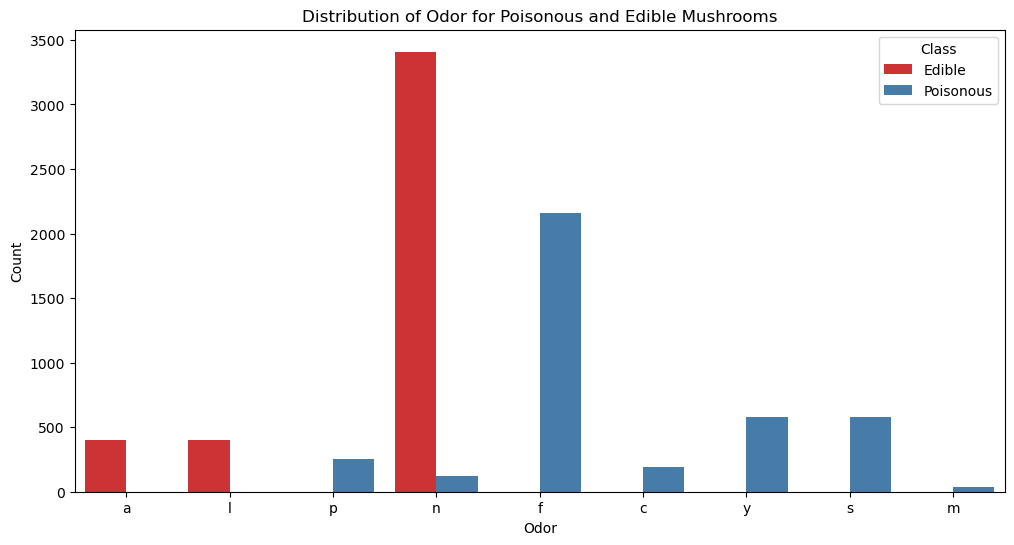

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='odor', hue='poisonous', data=mushroom, palette='Set1')
plt.title('Distribution of Odor for Poisonous and Edible Mushrooms')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

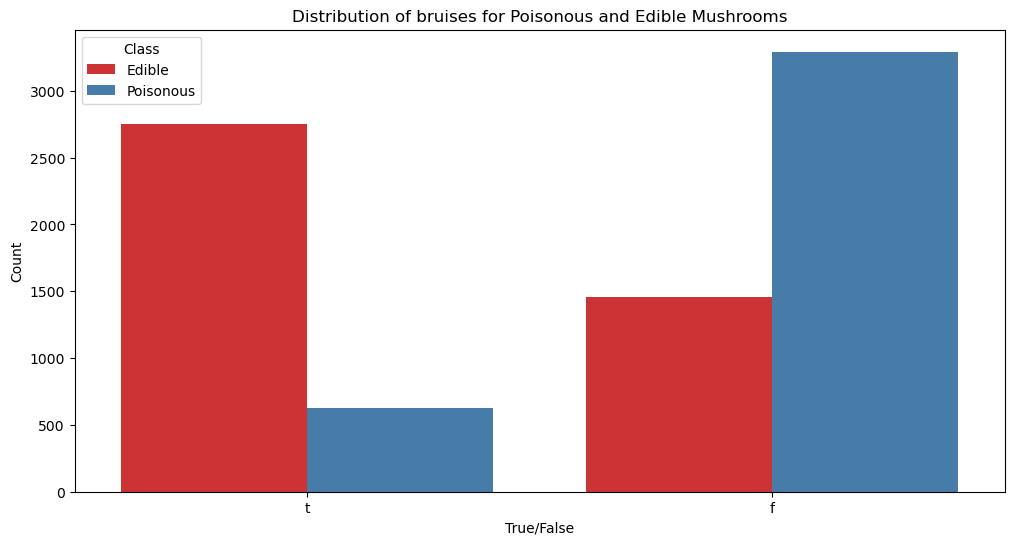

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x='bruises?', hue='poisonous', data=mushroom, palette='Set1')
plt.title('Distribution of bruises for Poisonous and Edible Mushrooms')
plt.xlabel('True/False')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

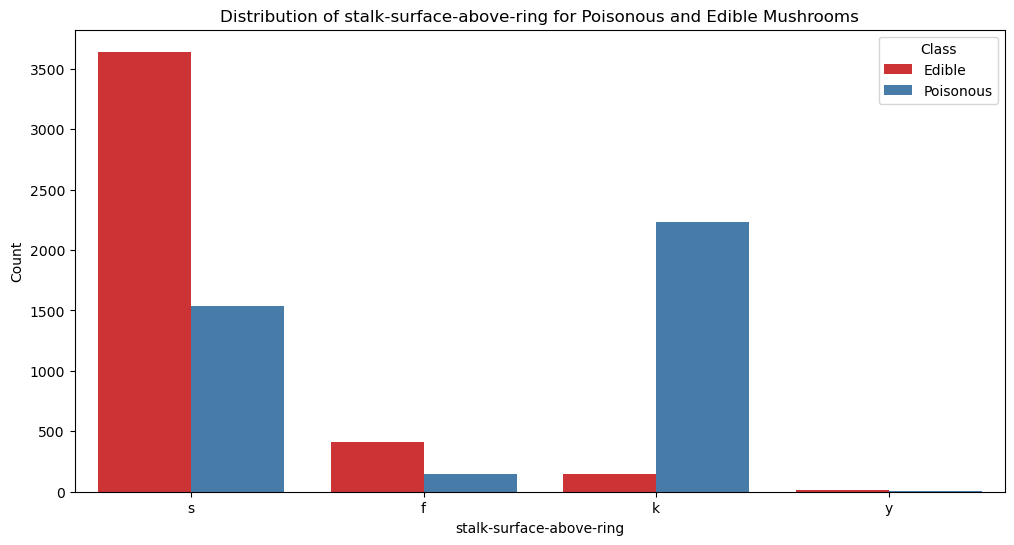

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='stalk-surface-above-ring', hue='poisonous', data=mushroom, palette='Set1')
plt.title('Distribution of stalk-surface-above-ring for Poisonous and Edible Mushrooms')
plt.xlabel('stalk-surface-above-ring')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

Some hit for forgers: 

- forgers should avoid pungent, foul, creosote, fishy, spicy and musty odor mushroom. Almond and anise odor mushrooms are quite safe.
- for none odor mushrooms, forgers should check for bruises, stalk-surface-above-ring, spore-print-color, and gill-size in order.
- Most mushrooms with bruises are safe
- Avoid silky stalk-surface-above-ring mushrooms



Some additional work that can be done to improve the recommendation, we can calculate shapley values (SHAP) for our top features and it can provide good analysis to the detailed feature values that we need to pay attention to.